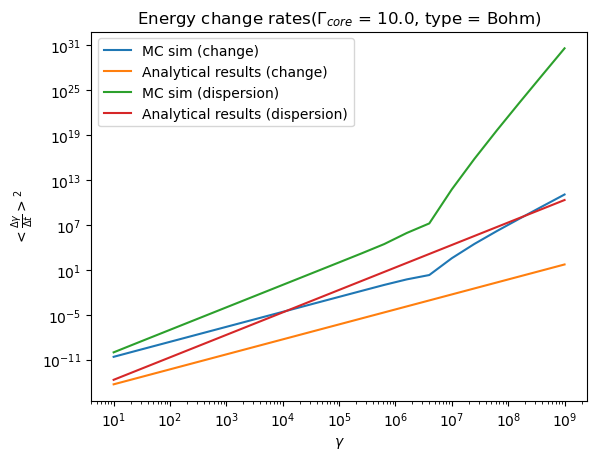

[2.5296255054899288377e-11, 1.6096526803752666421e-10, 1.0169788502975079596e-09, 6.4180591094267831744e-09, 4.0496566727644721296e-08, 2.5551733171644719e-07, 1.6122052204497786528e-06, 1.0172299612746226208e-05, 6.418221016864634591e-05, 0.0004049437691583860617, 0.0025544034060533486442, 0.016094008863791843396, 0.10052427382236382509, 0.5494485822443729213, 2.0974125762255531353, 369.40917692388228769, 29620.88194005283336, 1569453.4774858127736, 69998204.919557113375, 2915299570.460176168, 118161373810.07390813]


In [94]:
import numpy as np
import matplotlib.pyplot as plt
import yaml
import astropy.constants as const

with open('/home/wsy/Acc_MC/MC_sim/paras.yaml', 'r') as f:
    config = yaml.safe_load(f)
    
pi = np.pi
c = (const.c.cgs).value
m_p = (const.m_p.cgs).value
m_e = (const.m_e.cgs).value
e = (const.e.esu).value
    
R_sh = float(config['R_sh'])
GM0 = float(config['GM0'])
eta = float(config['eta'])
beta_min = float(config['beta_min'])
B0 = float(config['B0'])
xi = float(config['xi'])
Lam_max = float(config['Lam_max'])
g_me0 = float(config['g_me0']) 
r0 = float(config['r0'])
n_p = float(config['n_p'])

N_par = int(config['N_par']) # 粒子数
N_time = int(float((config['N_time']))) # 时间步数
N_bins = int(config['N_bins']) # 时间步长

jet_type = str(config['type'])
syn = bool(config['SYN_flag'])
SA = bool(config['SA_flag'])
Sh = bool(config['Shear_flag'])
ESC = bool(config['ESC_flag'])

if jet_type=='kolgv': 
    q = 5/3
elif jet_type=='Bohm':
    q = 1
elif jet_type=='HS':
    q = 2
else:
    raise ValueError("The input should be meaningful")


def beta_dis(r):
    beta_max = np.sqrt(1-1/GM0**2)
    r1 = eta*R_sh
    if (r < r1):
        return beta_max
    elif (r > R_sh):
        return 0.0
    else: 
        return beta_max-((beta_max-beta_min)/(R_sh-r1))*(r-r1)
    
def Rg_calc(g_me):
    return np.sqrt(g_me**2)*m_e*c**2/(e*B0)


def tau_calc(g_me):
    return Rg_calc(g_me)**(2-q)*Lam_max**(q-1)*(c*xi)**(-1)

def T_sh(B0,gme):
    beta0 = beta_dis(0) #中心流速
    beta = beta_dis(r0) #注入位置流速
    rate = 1- eta # 剪切区域比例
    Delta_r = rate*R_sh
    A_sc = xi**(-1)*Lam_max**(q-1)*c**(-1)*(m_e*np.square(c)/(e*B0))**(2-q)
    Gamma_j4 = 1/(1-beta**2)**2
    A1=(2/15)*Gamma_j4*np.square(c*(beta0/Delta_r))*A_sc
    t_sh = 2*gme**(q-2)/(A1*(6-q))
    return t_sh

def Dispr_gamma(gme):
    beta0 = beta_dis(0) #中心流速
    beta = beta_dis(r0) #注入位置流速
    rate = 1- eta # 剪切区域比例
    Gamma_j4 = 1/(1-beta**2)**2
    Delta_r = rate*R_sh
    res = (2/15)*Gamma_j4*np.square(c*(beta0/Delta_r))*gme**2*tau_calc(gme)
    return res
    
ba = B0 / np.sqrt(B0**2 + 4 * pi * n_p * m_p * c**2)  # 无量纲Alfven波速

nan = np.nan
tar_dir = '/home/wsy/Acc_MC/MC_sim/codes/Code_Trials/cpp_results/'
dgammas = np.loadtxt(tar_dir + 'results_sol.txt')
#print(gammas)
gmes = dgammas[-1,:]
tau = tau_calc(gmes)
tau0 = tau_calc(100)
ave_list1 = []
ave_list2 = []
for i in range(len(dgammas[0,:])):
    mean_rate = np.mean((dgammas[: -1, i]), dtype=np.float128)/tau[i]
    #print(gmes[i])
    ave_list1.append(mean_rate)

for j in range(len(dgammas[0,:])):
    mean_rate2 = np.mean((dgammas[: -1, j])**2, dtype=np.float128)/tau[j]
    ave_list2.append(mean_rate2)
    
t_sh = T_sh(B0,gmes)
rates = gmes/t_sh
disps = Dispr_gamma(gmes)
#print(ave_list)
plt.plot(gmes, ave_list1, label = 'MC sim (change)')
plt.plot(gmes, rates, label = 'Analytical results (change)')
plt.plot(gmes, ave_list2, label = 'MC sim (dispersion)')
plt.plot(gmes, disps, label = 'Analytical results (dispersion)')
plt.xscale('log')
plt.yscale('log')
plt.title(r'Energy change rates($\Gamma_{core}$ = %s, type = %s)'%(GM0,jet_type))
plt.xlabel(r'$\gamma$')
plt.ylabel(r'$<\frac{\Delta \gamma}{\Delta t}>^2$')
plt.legend()
plt.show()

print(ave_list1)

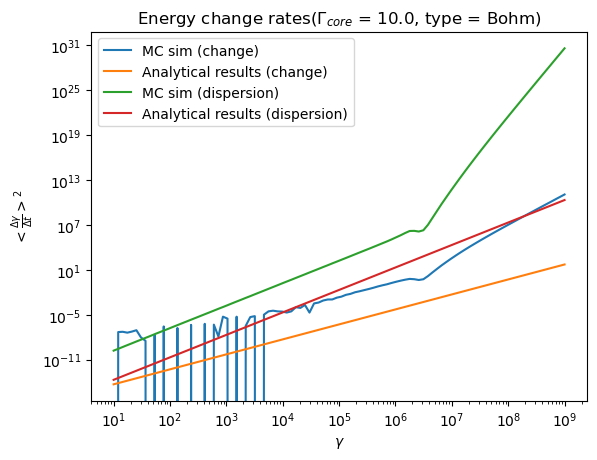

[1.6950172538041557e-10, 2.949539558903117e-10, 5.242290630691256e-10, 9.194662308021883e-10, 1.6074839550588198e-09, 2.835633121735781e-09, 4.907387798514774e-09, 8.574799653695387e-09, 1.491951890096939e-08, 2.6552967009873528e-08, 4.627506867290047e-08, 8.05453665191467e-08, 1.3934811490829416e-07, 2.4644954948838474e-07, 4.297399136205021e-07, 7.53252477909246e-07, 1.3107495916417528e-06, 2.303411118043348e-06, 3.9967936767286795e-06, 6.988078148808253e-06, 1.2208815261508283e-05, 2.1216685868728048e-05, 3.7229424761884105e-05, 6.55331880241944e-05, 0.00011264847756853137, 0.00019699329264607045, 0.0003493631504541016, 0.0006105806060202601, 0.0010603194134251733, 0.0018688245453906361, 0.0032058954851981484, 0.0056693546154460315, 0.00988990361912129, 0.017249897922605895, 0.03030647840100883, 0.05286790051286564, 0.09245593518590248, 0.16300975053170608, 0.283995152675817, 0.4911182077755488, 0.8635398258424541, 1.5058314312601788, 2.6235782510548518, 4.618593500679245, 8.0363820

In [95]:

dgammas = np.loadtxt('/home/wsy/Acc_MC/MC_sim/codes/Code_Trials/cpp_random/Gammas.txt')
x = np.loadtxt('/home/wsy/Acc_MC/MC_sim/codes/Code_Trials/cpp_random/gmes.txt')
tau = tau_calc(x)
ave_list1 = []
ave_list2 = []
for i in range(len(dgammas[0,:])):
    mean_rate = np.mean((dgammas[:, i])/tau[i])
    #print(gmes[i])
    ave_list1.append(mean_rate)

for j in range(len(dgammas[0,:])):
    mean_rate2 = np.mean((dgammas[:, j])**2/tau[j])
    ave_list2.append(mean_rate2)

t_sh = T_sh(B0,x)
rates = x/t_sh
disps = Dispr_gamma(x)
plt.plot(x, ave_list1, label = 'MC sim (change)')
plt.plot(x, rates, label = 'Analytical results (change)')
plt.plot(x, ave_list2, label = 'MC sim (dispersion)')
plt.plot(x, disps, label = 'Analytical results (dispersion)')
plt.xscale('log')
plt.yscale('log')
plt.title(r'Energy change rates($\Gamma_{core}$ = %s, type = %s)'%(GM0,jet_type))
plt.xlabel(r'$\gamma$')
plt.ylabel(r'$<\frac{\Delta \gamma}{\Delta t}>^2$')
plt.legend()
plt.show()
print(ave_list2)



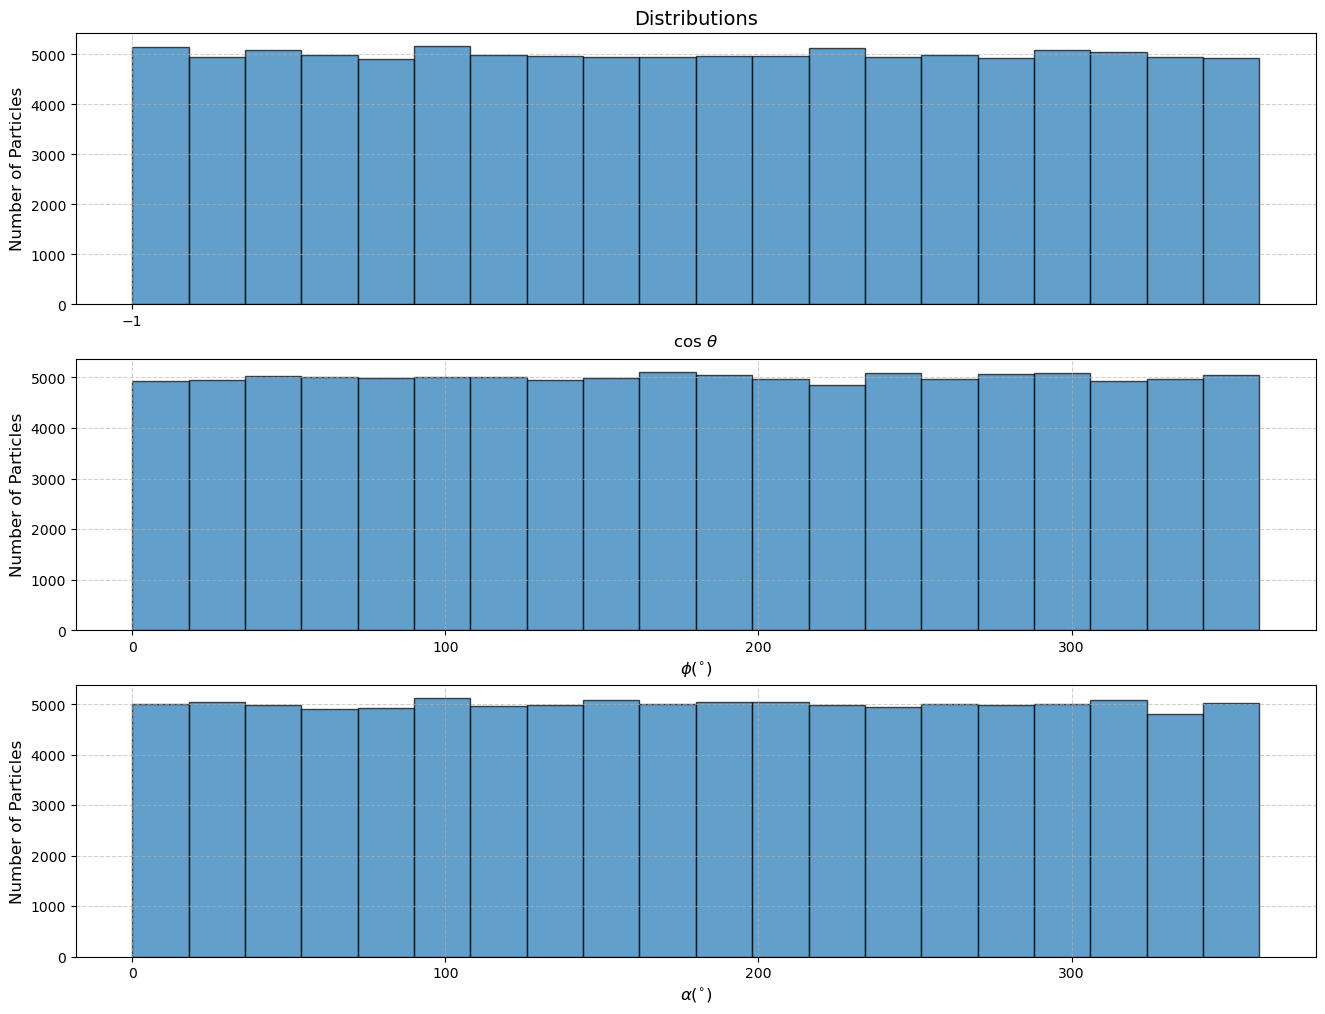

In [96]:
tar_dir = '/home/wsy/Acc_MC/MC_sim/codes/Code_Trials/cpp_random/'
idx = 0
costhetas = np.loadtxt(tar_dir + 'Costhetas.txt')
cos1 = costhetas[:,idx]
thetas = cos1

phis_pros = np.loadtxt(tar_dir + 'Phis.txt')
phi1 = phis_pros[:,idx]
phis = np.degrees(phi1)

alphas_pros = np.loadtxt(tar_dir + 'Alphas.txt')
alpha1 = alphas_pros[:,idx]
alphas = np.degrees(alpha1)


# 绘制直方图
fig = plt.figure(figsize = (16,12))
ax1 = fig.add_subplot(311)
n, bins, patches = plt.hist(thetas, 
                            bins=20, 
                            range=(-1, 1), 
                            edgecolor='black', 
                            alpha=0.7,
                            color='#1f77b4')
ax1.set_title('Distributions', fontsize=14)
ax1.set_xlabel(r'cos $\theta$', fontsize=12)
ax1.set_ylabel('Number of Particles', fontsize=12)
ax1.set_xticks(np.arange(-1, 1, 100)) 
ax1.grid(True, linestyle='--', alpha=0.6)

ax2 = fig.add_subplot(312)
n, bins, patches = plt.hist(phis, 
                            bins=20, 
                            range=(0,360), 
                            edgecolor='black', 
                            alpha=0.7,
                            color='#1f77b4')
#ax2.set_title(r'$\phi$ Distribution', fontsize=14)
ax2.set_xlabel(r'$\phi(^{\circ})$', fontsize=12)
ax2.set_ylabel('Number of Particles', fontsize=12)
ax2.set_xticks(np.arange(0, 360, 100)) 
ax2.grid(True, linestyle='--', alpha=0.6)

ax3 = fig.add_subplot(313)
n, bins, patches = plt.hist(alphas, 
                            bins=20, 
                            range=(0,360), 
                            edgecolor='black', 
                            alpha=0.7,
                            color='#1f77b4')
#ax3.set_title(r'$\alpha$ Distribution', fontsize=14)
ax3.set_xlabel(r'$\alpha(^{\circ})$', fontsize=12)
ax3.set_ylabel('Number of Particles', fontsize=12)
ax3.set_xticks(np.arange(0, 360, 100)) 
ax3.grid(True, linestyle='--', alpha=0.6)
plt.show()

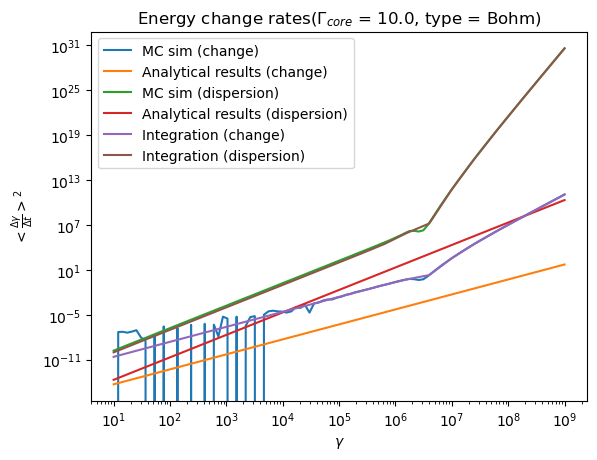

[1.6950172538041557e-10, 2.949539558903117e-10, 5.242290630691256e-10, 9.194662308021883e-10, 1.6074839550588198e-09, 2.835633121735781e-09, 4.907387798514774e-09, 8.574799653695387e-09, 1.491951890096939e-08, 2.6552967009873528e-08, 4.627506867290047e-08, 8.05453665191467e-08, 1.3934811490829416e-07, 2.4644954948838474e-07, 4.297399136205021e-07, 7.53252477909246e-07, 1.3107495916417528e-06, 2.303411118043348e-06, 3.9967936767286795e-06, 6.988078148808253e-06, 1.2208815261508283e-05, 2.1216685868728048e-05, 3.7229424761884105e-05, 6.55331880241944e-05, 0.00011264847756853137, 0.00019699329264607045, 0.0003493631504541016, 0.0006105806060202601, 0.0010603194134251733, 0.0018688245453906361, 0.0032058954851981484, 0.0056693546154460315, 0.00988990361912129, 0.017249897922605895, 0.03030647840100883, 0.05286790051286564, 0.09245593518590248, 0.16300975053170608, 0.283995152675817, 0.4911182077755488, 0.8635398258424541, 1.5058314312601788, 2.6235782510548518, 4.618593500679245, 8.0363820

In [97]:
# Comparison between the two cases
dgammas = np.loadtxt('/home/wsy/Acc_MC/MC_sim/codes/Code_Trials/cpp_random/Gammas.txt')
x = np.loadtxt('/home/wsy/Acc_MC/MC_sim/codes/Code_Trials/cpp_random/gmes.txt')
tau = tau_calc(x)
ave_list1 = []
ave_list2 = []
for i in range(len(dgammas[0,:])):
    mean_rate = np.mean((dgammas[:, i])/tau[i])
    #print(gmes[i])
    ave_list1.append(mean_rate)

for j in range(len(dgammas[0,:])):
    mean_rate2 = np.mean((dgammas[:, j])**2/tau[j])
    ave_list2.append(mean_rate2)

t_sh = T_sh(B0,x)
rates = x/t_sh
disps = Dispr_gamma(x)

tar_dir = '/home/wsy/Acc_MC/MC_sim/codes/Code_Trials/cpp_results/'
dgammas = np.loadtxt(tar_dir + 'results_sol.txt')
#print(gammas)
gmes = dgammas[-1 ,:]
tau = tau_calc(gmes)
tau0 = tau_calc(100)
ave_list1_cont = []
ave_list2_cont = []
for i in range(len(dgammas[0,:])):
    mean_rate = np.mean((dgammas[: -1, i]), dtype=np.float128)/tau[i]
    #print(gmes[i])
    ave_list1_cont.append(mean_rate)

for j in range(len(dgammas[0,:])):
    mean_rate2 = np.mean((dgammas[: -1, j])**2, dtype=np.float128)/tau[j]
    ave_list2_cont.append(mean_rate2)

plt.plot(x, ave_list1, label = 'MC sim (change)')
plt.plot(x, rates, label = 'Analytical results (change)')
plt.plot(x, ave_list2, label = 'MC sim (dispersion)')
plt.plot(x, disps, label = 'Analytical results (dispersion)')
plt.plot(gmes, ave_list1_cont, label = 'Integration (change)')
plt.plot(gmes, ave_list2_cont, label = 'Integration (dispersion)')
plt.xscale('log')
plt.yscale('log')
plt.title(r'Energy change rates($\Gamma_{core}$ = %s, type = %s)'%(GM0,jet_type))
plt.xlabel(r'$\gamma$')
plt.ylabel(r'$<\frac{\Delta \gamma}{\Delta t}>^2$')
plt.legend()
plt.show()
print(ave_list2)